In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge,Lasso
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.svm as svm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
# from sklearn import RandomForestClassifier

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/mnist_train.csv',header='infer').values

print(data.shape)

(60000, 785)


**Trying to check the y values**

In [ ]:
print(data[59000][-1])

0


In [ ]:
list_of_records=[]
freq=[0]*10

print(freq)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for record in data:
  if (freq[record[0]]==100):
    continue
  else:
    list_of_records.append(record)
    freq[record[0]]+=1


In [ ]:
data=np.array(list_of_records)

In [ ]:
print(data.shape)

(1000, 785)


In [ ]:
x=data[:,1:]
y=data[:,0]

In [ ]:
print(x.shape)
print(y.shape)

(1000, 784)
(1000,)


In [ ]:
# y=y.reshape((y.shape[0],-1))
# print(y.shape)

(60000, 1)


In [ ]:
print(np.unique(y))
# print(np.unique(data[:,0]))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 784)
(700,)
(300, 784)
(300,)




---



**SVM**



---



In [ ]:
model=svm.SVC(kernel='linear',C=1,gamma='scale')
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

This is the eval for the svm mdoel

In [ ]:
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print("Accuracy in normal SVC with unoptimised parameters : ",accuracy)
# print()

Accuracy in normal SVC with unoptimised parameters :  0.88


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       1.00      0.93      0.96        29
           2       0.92      0.77      0.84        30
           3       0.85      0.83      0.84        42
           4       0.96      0.85      0.90        27
           5       0.74      0.77      0.75        26
           6       0.97      0.91      0.94        34
           7       0.81      0.96      0.88        27
           8       0.88      0.95      0.91        22
           9       0.71      0.92      0.80        26

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In the case of **grid search**

In [ ]:
model3=svm.SVC(gamma='auto')

In [ ]:
params={'kernel': ['linear','rbf'], 'C': [1,20,30]}
grid_model=GridSearchCV(model3, params, cv=5)

grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 20, 30], 'kernel': ['linear', 'rbf']})

In [ ]:
best_model=grid_model.best_estimator_

In [ ]:
print("Accuracy score from grid search with SVM is ",accuracy_score(y_test,best_model.predict(x_test)))

Accuracy score from grid search with SVM is  0.88


In [ ]:
print(classification_report(best_model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       1.00      0.93      0.96        29
           2       0.92      0.77      0.84        30
           3       0.85      0.83      0.84        42
           4       0.96      0.85      0.90        27
           5       0.74      0.77      0.75        26
           6       0.97      0.91      0.94        34
           7       0.81      0.96      0.88        27
           8       0.88      0.95      0.91        22
           9       0.71      0.92      0.80        26

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300





---



**DecisionTreeClassifier**



---



In [ ]:
model2=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [ ]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(0.553314393939394, 0.95, 'x[378] <= 147.0\nentropy = 3.318\nsamples = 700\nvalue = [66, 73, 75, 59, 76, 73, 68, 68, 76, 66]\nclass = 5'),
 Text(0.3119318181818182, 0.85, 'x[156] <= 3.0\nentropy = 3.06\nsamples = 401\nvalue = [66.0, 4.0, 45.0, 12.0, 64.0, 36.0, 51.0, 66.0, 15.0\n42.0]\nclass = 1'),
 Text(0.43262310606060606, 0.8999999999999999, 'True  '),
 Text(0.17007575757575757, 0.75, 'x[239] <= 14.0\nentropy = 2.655\nsamples = 227\nvalue = [11.0, 0.0, 10.0, 7.0, 61.0, 20.0, 9.0, 65.0, 6.0\n38.0]\nclass = 8'),
 Text(0.10303030303030303, 0.65, 'x[568] <= 70.0\nentropy = 2.002\nsamples = 94\nvalue = [1.0, 0.0, 2.0, 3.0, 58.0, 9.0, 7.0, 5.0, 2.0, 7.0]\nclass = 5'),
 Text(0.07878787878787878, 0.55, 'x[183] <= 136.5\nentropy = 1.611\nsamples = 83\nvalue = [1.0, 0.0, 1.0, 3.0, 58.0, 1.0, 7.0, 5.0, 0.0, 7.0]\nclass = 5'),
 Text(0.048484848484848485, 0.45, 'x[524] <= 17.0\nentropy = 1.059\nsamples = 71\nvalue = [0.0, 0.0, 1.0, 1.0, 58.0, 1.0, 7.0, 2.0, 0.0, 1.0]\nclass = 5'),
 Text(0.0

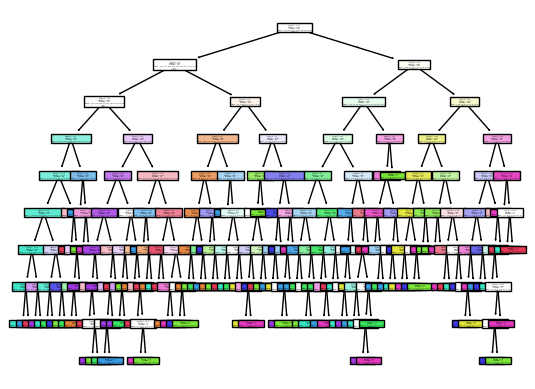

In [ ]:
plot_tree(model2,class_names=["1","2","3","4","5","6","7","8","9","10"],filled=True)

In [ ]:
y_pred_trees=model2.predict(x_test)

print("Accuracy scores are for id3 decision tree are:",accuracy_score(y_test,y_pred_trees))

Accuracy scores are for id3 decision tree are: 0.6433333333333333


In [ ]:
print(classification_report(model2.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.96      0.72      0.83        36
           2       0.48      0.57      0.52        21
           3       0.71      0.76      0.73        38
           4       0.71      0.57      0.63        30
           5       0.52      0.52      0.52        27
           6       0.53      0.71      0.61        24
           7       0.56      0.50      0.53        36
           8       0.75      0.75      0.75        24
           9       0.44      0.48      0.46        31

    accuracy                           0.64       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.66      0.64      0.65       300



In [ ]:
model_gini=DecisionTreeClassifier(criterion='gini',random_state=42)

In [ ]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.6869153911564626, 0.9642857142857143, 'x[101] <= 2.5\ngini = 0.899\nsamples = 700\nvalue = [66, 73, 75, 59, 76, 73, 68, 68, 76, 66]\nclass = 5'),
 Text(0.4146471088435374, 0.8928571428571429, 'x[377] <= 3.5\ngini = 0.894\nsamples = 631\nvalue = [63.0, 70.0, 61.0, 59.0, 75.0, 72.0, 21.0, 68.0, 76.0\n66.0]\nclass = 9'),
 Text(0.55078125, 0.9285714285714286, 'True  '),
 Text(0.12818877551020408, 0.8214285714285714, 'x[436] <= 3.0\ngini = 0.833\nsamples = 270\nvalue = [51, 1, 34, 6, 54, 16, 11, 66, 5, 26]\nclass = 8'),
 Text(0.05102040816326531, 0.75, 'x[183] <= 51.5\ngini = 0.519\nsamples = 71\nvalue = [48.0, 0.0, 5.0, 2.0, 2.0, 7.0, 0.0, 6.0, 1.0, 0.0]\nclass = 1'),
 Text(0.034013605442176874, 0.6785714285714286, 'x[743] <= 3.0\ngini = 0.773\nsamples = 16\nvalue = [1, 0, 1, 1, 2, 5, 0, 5, 1, 0]\nclass = 6'),
 Text(0.027210884353741496, 0.6071428571428571, 'x[547] <= 137.0\ngini = 0.727\nsamples = 11\nvalue = [1, 0, 1, 1, 2, 5, 0, 0, 1, 0]\nclass = 6'),
 Text(0.02040816326530612, 

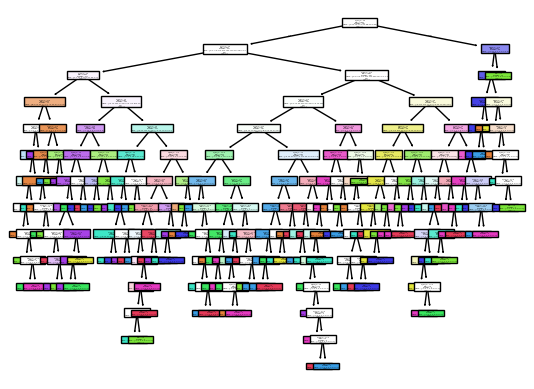

In [ ]:
plot_tree(model_gini,class_names=["1","2","3","4","5","6","7","8","9","10"],filled=True)

In [ ]:

print("Accuracy scores are for id3 decision tree are:",accuracy_score(y_test,model_gini.predict(x_test)))

Accuracy scores are for id3 decision tree are: 0.68


In [ ]:
print(classification_report(model_gini.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66        33
           1       0.93      0.83      0.88        30
           2       0.60      0.56      0.58        27
           3       0.73      0.81      0.77        37
           4       0.46      0.55      0.50        20
           5       0.74      0.54      0.62        37
           6       0.69      0.73      0.71        30
           7       0.75      0.80      0.77        30
           8       0.79      0.59      0.68        32
           9       0.47      0.67      0.55        24

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.67       300
weighted avg       0.70      0.68      0.68       300



In [ ]:
grid_params={
    'min_samples_split':[2,5,7,10,15],
    'min_samples_leaf': [1,2,6,8,10,15],
    'max_depth' : [5,8,10,20,30]
}
grid_search_model_gini=GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=42),grid_params, cv=5)

In [ ]:
grid_search_model_gini.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 6, 8, 10, 15],
                         'min_samples_split': [2, 5, 7, 10, 15]})

In [ ]:
best_gini=grid_search_model_gini.best_estimator_

In [ ]:
print("With grid search in gini , the accuracy is ", accuracy_score(y_test,best_gini.predict(x_test)))

With grid search in gini , the accuracy is  0.6533333333333333


In [ ]:
print(classification_report(best_gini.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        30
           1       0.93      0.78      0.85        32
           2       0.60      0.48      0.54        31
           3       0.73      0.75      0.74        40
           4       0.46      0.48      0.47        23
           5       0.67      0.55      0.60        33
           6       0.62      0.67      0.65        30
           7       0.72      0.74      0.73        31
           8       0.75      0.67      0.71        27
           9       0.44      0.65      0.53        23

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.67      0.65      0.66       300



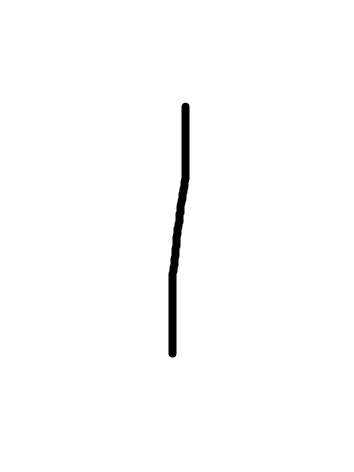

(472, 354, 3)
[0]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image=cv2.imread('/content/mysnip.png')
cv2_imshow(image)
print(image.shape)

grayscale=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
grayscale=cv2.resize(grayscale,(28,28))
new_image=grayscale.reshape((1,-1))

prediction=best_model.predict(new_image)
print(prediction)

